## Multiple Subplots

In [192]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

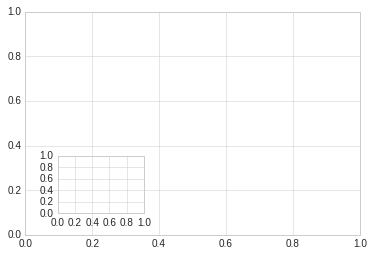

In [193]:
#plt.axes: Subplots by Hand
#plt.axes has 4 coordinates [bottom, left, width,height]
ax1 = plt.axes()
ax2 = plt.axes([0.2, 0.2, 0.2, 0.2])


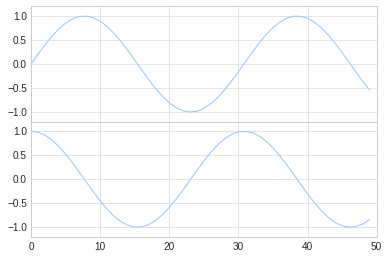

In [194]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels= [], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim= (-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

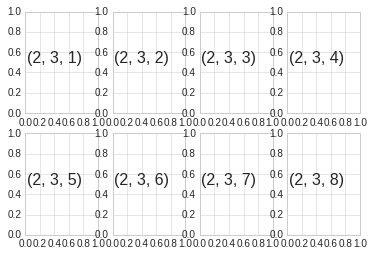

In [195]:
#plt.subplot: Simple Grids of Subplots
for i in range(1,9):
  plt.subplot(2, 4, i)
  plt.text(0.4, 0.5, str((2, 3, i)),fontsize = 16, ha = 'center')

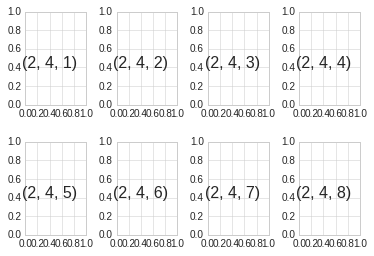

In [196]:
#spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace= 0.5)
for i in range(1, 9):
  ax = fig.add_subplot(2, 4, i)
  ax.text(0.4,0.4, str((2, 4, i)), fontsize = 16, ha= 'center')

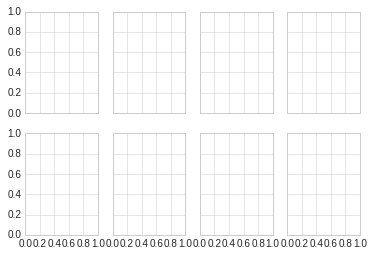

In [197]:
#plt.subplots: The Whole Grid in One Go
fix, ax = plt.subplots(2, 4, sharex= 'col', sharey = 'row')

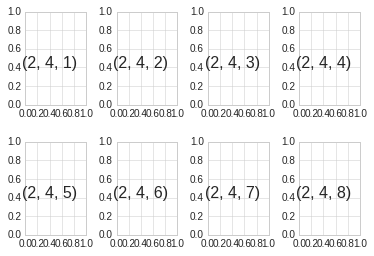

In [198]:
for i in range(2):
  for j in range(3):
    ax[i, j].text(0.5, 0.5, str((i, j)),fontsize = 16, ha = 'center')

fig

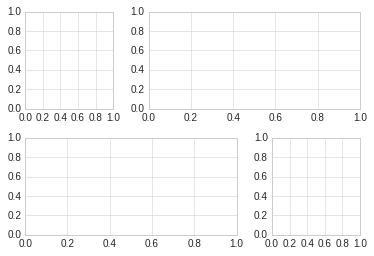

In [199]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0 , 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1,: 2])
plt.subplot(grid[1 , 2]);

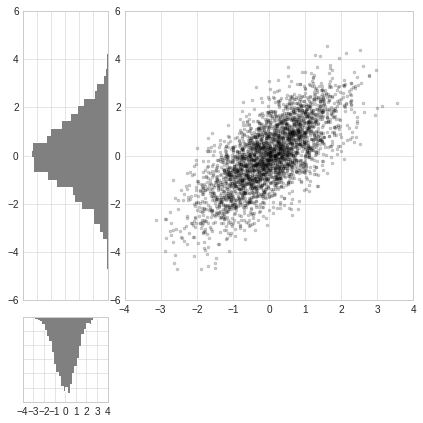

In [200]:
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(7,7))
grid = plt.GridSpec(4, 4, hspace= 0.2, wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey= main_ax)
x_hist = fig.add_subplot(grid[-1,:1], yticklabels=[], sharex = main_ax)


# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize = 3, alpha = 0.2)


x_hist.hist(x, 30, histtype= 'stepfilled', orientation = 'vertical', color = 'gray')
x_hist.invert_yaxis()
y_hist.hist(y, 30, histtype = 'stepfilled', orientation = 'horizontal', color= 'gray')
y_hist.invert_xaxis()

## Text and Annotation

In [201]:

births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


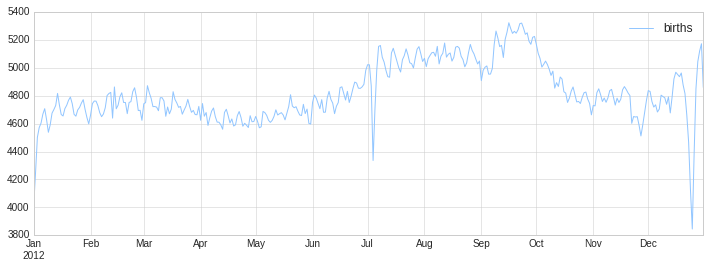

In [202]:

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

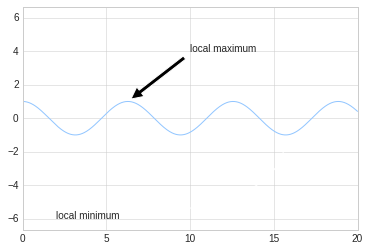

In [203]:
fig,ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5* np.pi, -1), xytext=(2, -6), arrowprops = dict(arrowstyle = "->", connectionstyle = 'angle3, angleA=0, angleB=90'));

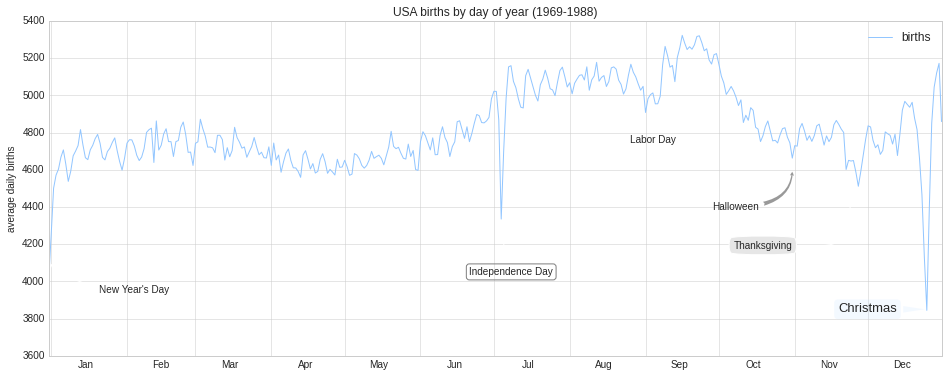

In [204]:
#using birthrate plot
fig, ax = plt.subplots(figsize=(16, 6))
births_by_date.plot(ax = ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1',4100), xycoords='data', xytext=(50,-30), 
            textcoords = 'offset points', arrowprops = dict(arrowstyle = '->', connectionstyle= 'arc3,rad=-0.2'))

ax.annotate('Independence Day', xy=('2012-7-4', 4250), xycoords= 'data', bbox = dict(boxstyle= 'round', fc= 'none', ec = 'gray'), 
              xytext= (10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle= '->'))

ax.annotate('Labor Day', xy=('2012-9-4', 4850),xycoords = 'data', ha = 'center', xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),xycoords='data', textcoords='data', arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',xytext=(-80, -40), textcoords='offset points',arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',xytext=(-120, -60), textcoords='offset points',bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',xytext=(-30, 0), textcoords='offset points',size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);


## Customizing Ticks

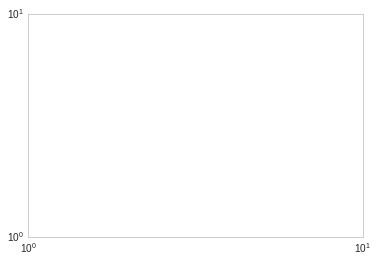

In [205]:
#Major and Minor Ticks
plt.style.use('seaborn-whitegrid')
ax = plt.axes(xscale= 'log', yscale='log')


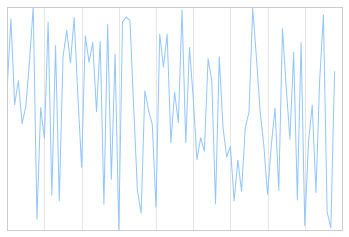

In [206]:
#Hiding Ticks or Labels
ax = plt.axes()
ax.plot(np.random.rand(89))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())


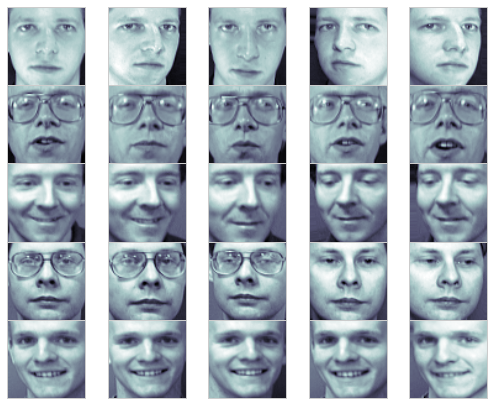

In [207]:
fig, ax = plt.subplots(5, 5, figsize=(9, 7))
fig.subplots_adjust(hspace=0, wspace= 0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
  for j in range(5):
    ax[i, j].xaxis.set_major_locator(plt.NullLocator())
    ax[i, j].yaxis.set_major_locator(plt.NullLocator())
    ax[i, j].imshow(faces[10* i  + j], cmap = 'bone')

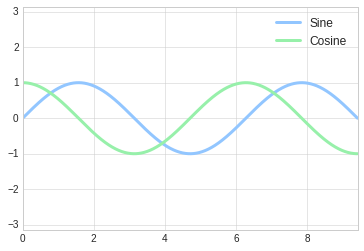

In [208]:
#Fancy Tick Formats
## Plot a sine and cosine curve

fig, ax =   plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000 )
ax.plot(x, np.sin(x), lw = 3, label = 'Sine')
ax.plot(x, np.cos(x), lw = 3, label = 'Cosine')


#grid, legend, and limits
ax.grid(True)
ax.legend(frameon= False)
ax.axis('equal')
ax.set_xlim(0, 3 *np.pi);


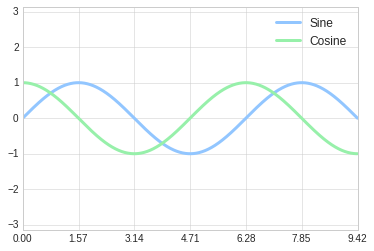

In [209]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig

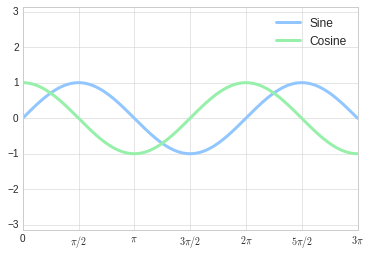

In [210]:
def format_func(value, tick_number):
#number of multiples of pi/2
  N= int(np.round(2 * value/ np.pi))
  if  N==0:
    return 0
  elif  N==1:
    return r"$\pi/2$"
  elif N == 2:
    return r"$\pi$"
  elif N % 2 > 0:
    return r"${0}\pi/2$".format(N)
  else:
    return r"${0}\pi$".format(N // 2) 

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func)) 
fig

##Summary of Formatters and Locators

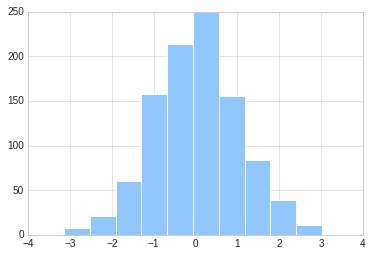

In [211]:
plt.style.use('seaborn-pastel')
import numpy as np
%matplotlib inline

x = np.random.randn(1000)
plt.hist(x);

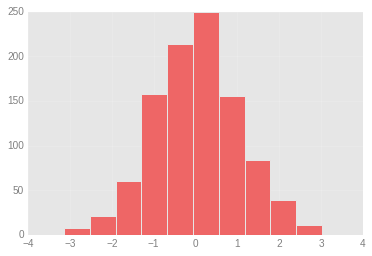

In [212]:
# use a gray background

ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

plt.grid(color= 'w', linestyle= 'solid', alpha = 0.3)

for spine in ax.spines.values():
  spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors = 'gray', direction = 'out')
for tick in ax.get_xticklabels():
  tick.set_color('gray')
for tick in ax.get_yticklabels():
  tick.set_color('gray')

# control face and edge color of histogram
ax.hist(x, edgecolor = '#E6E6E6', color ='#EE6666' );

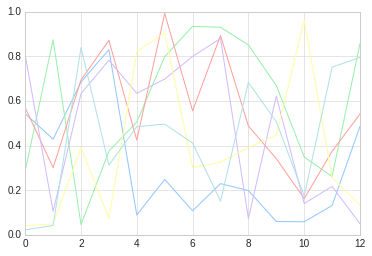

In [213]:
#Changing the Defaults: rcParams
for i in range(6):
  plt.plot(np.random.rand(13))

In [214]:
#Stylesheets
IPython_default = plt.rcParams.copy()
from matplotlib import cycler
plt.style.available[:10]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn']

In [215]:
plt.style.use('seaborn')

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


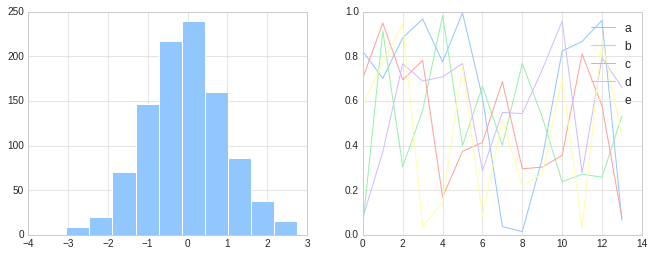

In [216]:
def hist_and_lines():
  np.random.seed(0)
  fig, ax = plt.subplots(1, 2, figsize=(11, 4))
  ax[0].hist(np.random.randn(1000))
  for i in range(5):
    ax[1].plot(np.random.rand(14))
  ax[1].legend(['a', 'b', 'c', 'd', 'e'], loc='upper right')

plt.rcParams.update(IPython_default);
hist_and_lines()

In [217]:
## reset rcParams
plt.rcParams.update(IPython_default);


/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


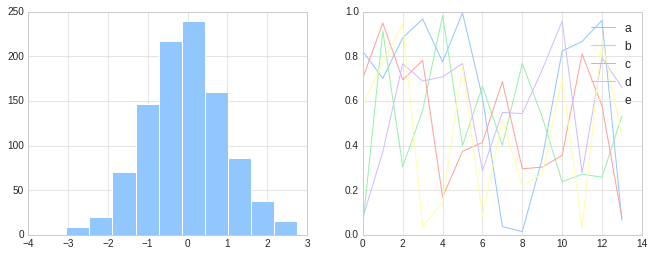

In [218]:
hist_and_lines()

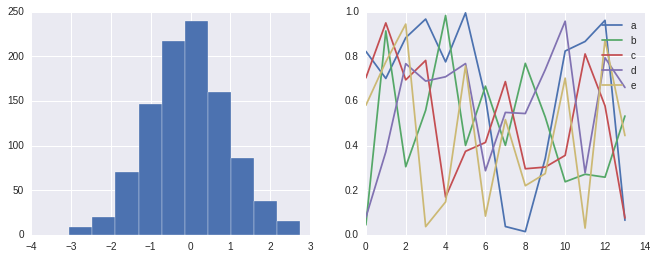

In [219]:
with plt.style.context('seaborn'):
  hist_and_lines()

## Three-Dimensional Plotting in Matplotlib

In [220]:
from mpl_toolkits import mplot3d



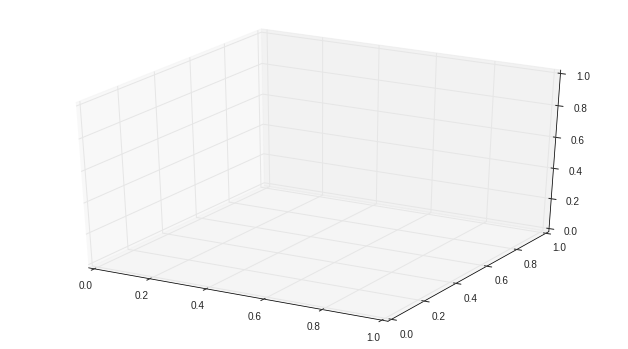

In [221]:


fig = plt.figure(figsize=(11, 6))
ax = plt.axes(projection='3d')

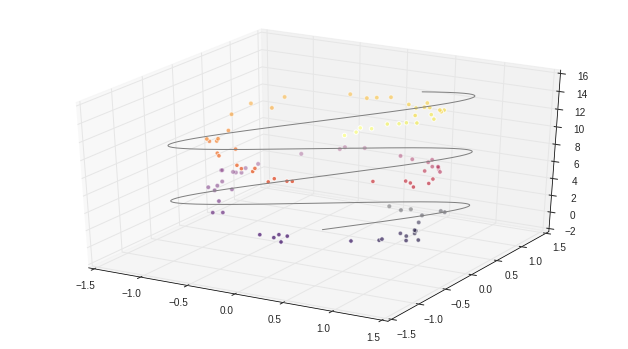

In [222]:
#Three-Dimensional Points and Lines
## Data for a three-dimensional line
fig = plt.figure(figsize=(11, 6))
ax = plt.axes(projection='3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.sin(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15* np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c= zdata,  cmap = 'inferno');

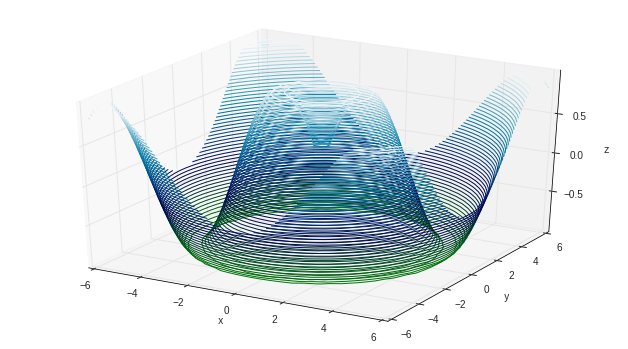

In [223]:
#Three-Dimensional Contour Plots
def f(x, y):
  return np.sin(np.sqrt(x** 2 + y** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(11, 6))
ax = plt.axes(projection = '3d')
ax.contour3D(X, Y, Z, 65, cmap= 'ocean')
ax.set_xlabel('   x')
ax.set_ylabel('   y')
ax.set_zlabel('   z');

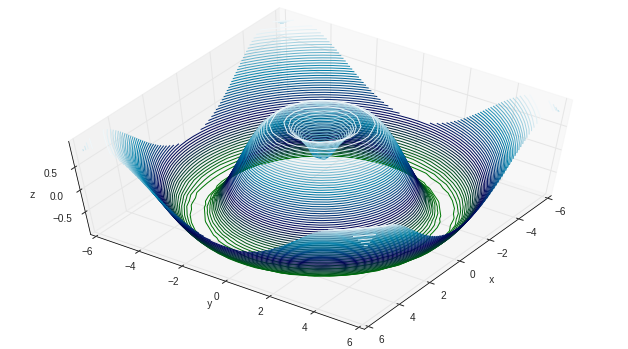

In [224]:
ax.view_init(60, 35)
fig

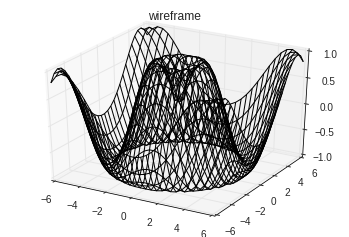

In [225]:
#Wireframes and Surface Plots
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
ax.set_title('wireframe');


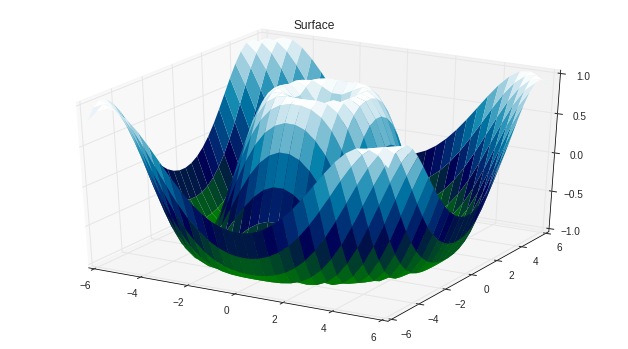

In [226]:
fig = plt.figure(figsize=(11, 6))
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'ocean', edgecolor = 'none')
ax.set_title('Surface');

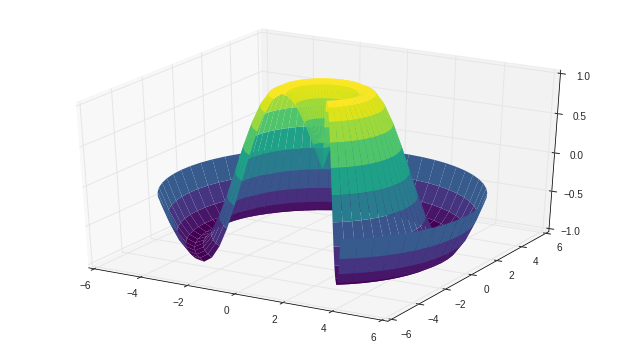

In [241]:
#slice into the function

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.8 *np.pi, 0.8* np.pi, 50)
r, theta = np.meshgrid(r, theta)

X =  r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

fig = plt.figure(figsize=(11, 6))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none');

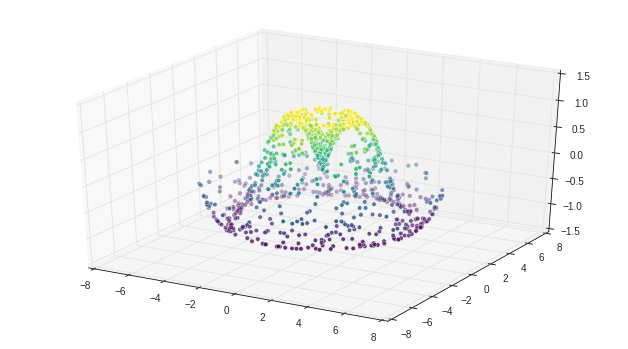

In [244]:
#Surface Triangulations
theta = 2* np.pi * np.random.random(1000)
r= 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

fig = plt.figure(figsize=(11, 6))
ax = plt.axes(projection = '3d')
ax.scatter(x, y, z, c=z, cmap = 'viridis', linewidth = 0.5);

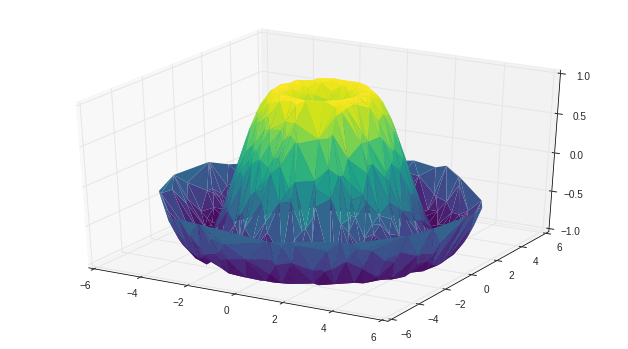

In [246]:
#ax.plot_trisurf
fig = plt.figure(figsize=(11, 6))

ax = plt.axes(projection = '3d')
ax.plot_trisurf(x, y, z, cmap= 'viridis', edgecolor = 'none');

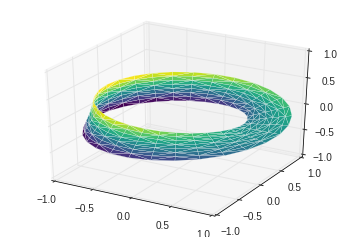

In [247]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)
phi = 0.5 * theta

# radius in x-y plane
r = 1 + w * np.cos(phi)
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
cmap='viridis', linewidths=0.2);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);